In [10]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [11]:
TRAIN_DIR = "../data/raw/NEU-DET/train"
VAL_DIR   = "../data/raw/NEU-DET/validation"

In [14]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names

Found 1440 files belonging to 6 classes.
Found 360 files belonging to 6 classes.


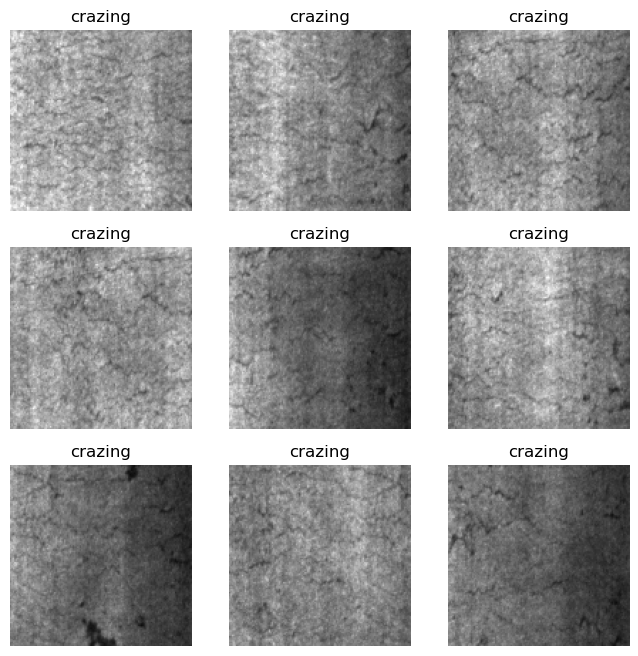

In [15]:
plt.figure(figsize=(8, 8))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [16]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [18]:
train_ds = train_ds.map(lambda x, y:(normalization_layer(x),y))
val_ds = val_ds.map(lambda x, y:(normalization_layer(x),y))

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
data_augmentation = tf.keras.Sequential([
    
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomTranslation(0.08, 0.08),


    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.15),

    tf.keras.layers.GaussianNoise(0.05),
])
